# Versuch 245: Induktion

## Auswertung der Messergebnisse

In [1]:
#Benötigte Pakete
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
%matplotlib inline 
plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 14
plt.rcParams["figure.figsize"][1] = 9
plt.rcParams['errorbar.capsize']=2

### Vorversuch

Die Ergebnisse des Vorversuchs werden im Rahmen der Auswertung im Protokollheft diskutiert.

### Teil 1: Induktionsgesetz

#### Frequenzabhängigkeit

In [2]:
#Messdaten mit Fehler gemäß Herstellerangabe
U_ind=0.5*np.array([1.82,3.76,6.08,7.80,10.80]) #Volt
U_ind_err=0.03*U_ind

omega=2*np.pi*np.array([2.95,5.78,9.21,11.70,15.30]) #1/s
omega_err=0.03*omega

I_s=np.array([3.914,3.907,3.903,3.900,3.901]) #A
I_s_err=0.012*I_s + 0.005*np.ones(5)

I_s_mean=np.mean(I_s)
I_s_mean_err=np.sqrt(np.sum(I_s_err**2))/len(I_s)
I_s_mean_std=np.std(I_s)/np.sqrt(len(I_s))

In [3]:
#Definieren der linearen Fit-Funktion
def linear(x,a,b):
    return a*x+b

popt1,pcov1=curve_fit(linear,omega,U_ind,sigma=U_ind_err)

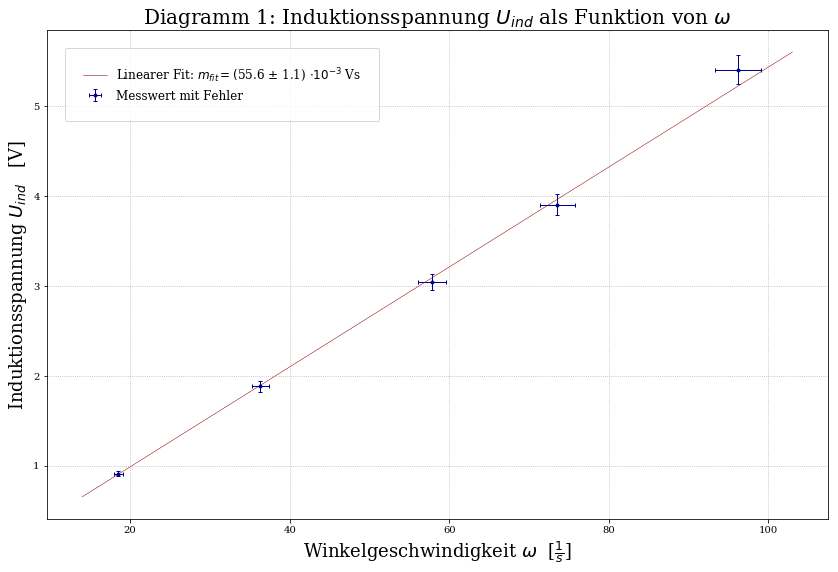

In [4]:
#Plot der Messdaten: U_ind gegen omega
plt.errorbar(omega, U_ind, xerr=omega_err, yerr=U_ind_err,linewidth=1,linestyle='',marker='.',color='darkblue', label='Messwert mit Fehler')
plt.plot(np.linspace(14,103,10),linear(np.linspace(14,103,10),*popt1),linewidth=0.5,color='darkred',label='Linearer Fit: $m_{fit} = ($' + str(round(popt1[0]*1e3,1)) + ' $\pm$ ' + str(round(pcov1[0,0]**0.5*1e3,1)) + r') $\cdot10^{-3}$ Vs')
plt.xlabel(r'Winkelgeschwindigkeit $ \omega$  [$\frac{1}{s}$]', size=18)
plt.ylabel(r'Induktionsspannung $ U_{ind}$   [V]', size=18)
plt.title(r'Diagramm 1: Induktionsspannung $U_{ind} $ als Funktion von $\omega$', size=20)
plt.grid(ls='dotted')

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)
plt.show()

In [5]:
#Güte des Fits
chi_squared1=np.sum((linear(omega,*popt1)-U_ind)**2/U_ind_err**2)

#Freiheitsgrade
dof1=len(U_ind)-2

chi_squared_red1=chi_squared1/dof1

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared1))
print('chi_squared_red= ' + str(chi_squared_red1))
print()

#Fitwahrscheinlichkeit
prob1=round(1-chi2.cdf(chi_squared1,dof1),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob1) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 1.9353204282220209
chi_squared_red= 0.6451068094073403

Die Fitwahrscheinlichkeit beträgt: 59.0 %


#### Abhängigkeit vom Spulenstrom

In [6]:
#Messdaten aus zweiter Messreihe 
U_ind2=0.5*np.array([1.00,1.90,2.74,3.60,4.38,5.32,6.20,7.00,7.84]) #Volt
U_ind2_err=0.015*U_ind2

I=np.array([0.502,1.009,1.508,2.002,2.500,3.002,3.507,3.999,4.502]) #A
I_err=0.012*I + 0.005*np.ones(9)

omega2=2*np.pi*10.3*np.ones(9) #1/s
omega2_err=0.03*omega2

popt2,pcov2=curve_fit(linear,I,U_ind2,sigma=U_ind2_err)

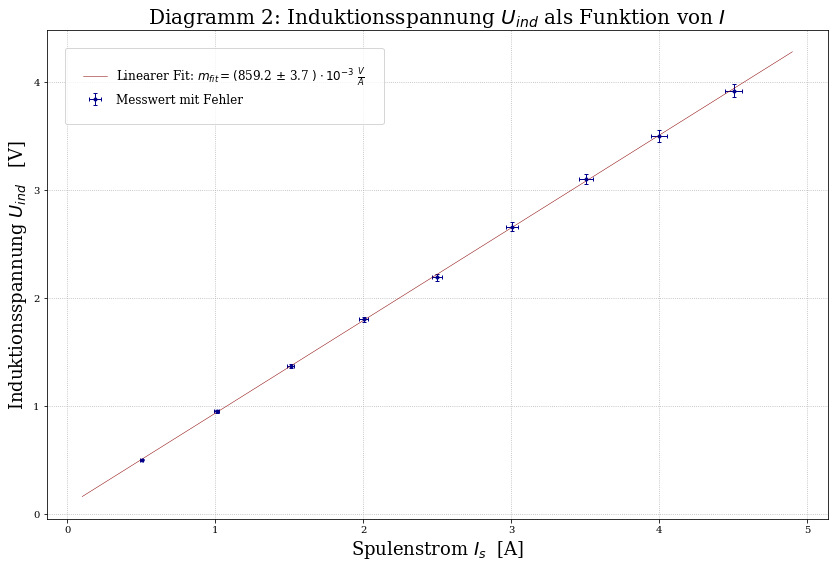

In [7]:
#Plot der Messdaten: U_ind gegen I_s
plt.errorbar(I, U_ind2, xerr=I_err, yerr=U_ind2_err,linewidth=1,linestyle='',marker='.',color='darkblue', label='Messwert mit Fehler')
plt.plot(np.linspace(0.1,4.9,10),linear(np.linspace(0.1,4.9,10),*popt2),linewidth=0.5,color='darkred',label='Linearer Fit: $m_{fit} = ($' + str(round(popt2[0]*1e3,1)) + ' $\pm$ ' + str(round(pcov2[0,0]**0.5*1e3,1)) + r' $) \cdot10^{-3} \ \frac{V}{A}$')
plt.xlabel(r'Spulenstrom $ I_s$  [A]', size=18)
plt.ylabel(r'Induktionsspannung $ U_{ind}$   [V]', size=18)
plt.title(r'Diagramm 2: Induktionsspannung $U_{ind} $ als Funktion von $I$', size=20)
plt.grid(ls='dotted')

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)
plt.show()

In [8]:
#Güte des Fits
chi_squared2=np.sum((linear(I,*popt2)-U_ind2)**2/U_ind2_err**2)

#Freiheitsgrade
dof2=len(U_ind2)-2

chi_squared_red2=chi_squared2/dof2

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared2))
print('chi_squared_red= ' + str(chi_squared_red2))
print()

#Fitwahrscheinlichkeit
prob2=round(1-chi2.cdf(chi_squared2,dof2),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob2) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 2.014084245171169
chi_squared_red= 0.28772632073873844

Die Fitwahrscheinlichkeit beträgt: 96.0 %


#### Berechung des Magnetfeldes und Vergleich mit der Theorie

In [9]:
#Berechnung aus dem Fit der Messwerte für U_ind(omega)

m_fit=popt1[0]
m_fit_err=pcov1[0,0]**0.5

#Wir wissen: B=-U_ind/A/omega/N_Flachspule=-m_fit/A/N_Flachspule

A=41.7e-4 #m^2
N=4000

B_gem=m_fit/(A*N)
B_gem_err=B_gem*(m_fit_err/m_fit)

print('Für das B-Feld aus dem linearen Fit folgt:')
print('B_gem = (' + str(B_gem*1e3) + ' +/- ' + str(B_gem_err*1e3) + ') 10^-3 T')

Für das B-Feld aus dem linearen Fit folgt:
B_gem = (3.3309927780756534 +/- 0.06337924703066043) 10^-3 T


In [10]:
#Konstanten und Angaben aus Versuchsaufbau

mu0=4*np.pi*1e-7 #Vs/Am
N2=124 #Windungszahl

#Radius aus Spulenfläche
R=0.5*295e-3

#Formel aus Anleitung
B_theo=(8*mu0*N2*I_s_mean)/(np.sqrt(125)*R)
B_theo_err=B_theo*(I_s_mean_err/I_s_mean)
B_theo_std=B_theo*(I_s_mean_std/I_s_mean)

print('Für den theoretischen Wert des Magnetfeldes im Zentrum der Spulen folgt:')
print('B_theo = (' + str(B_theo*1e3) + ' +/- ' + str(B_theo_err*1e3) + ' +/- ' + str(B_theo_std*1e3) + ') 10^-3 T')

Für den theoretischen Wert des Magnetfeldes im Zentrum der Spulen folgt:
B_theo = (2.9518585830526183 +/- 0.01753163102919977 +/- 0.0017237575491752238) 10^-3 T


In [11]:
#Vergleich Messwert-Theorie

diff_B=np.abs(B_theo-B_gem)
diff_B_err=np.sqrt((B_theo_err)**2+(B_gem_err)**2)

print('Damit ergibt sich für die Differenz aus Messwert und Theorie:')
print('∆B = (' + str(diff_B*1e3) + ' +/- ' + str(diff_B_err*1e3) + ') 10^-3 T')

Damit ergibt sich für die Differenz aus Messwert und Theorie:
∆B = (0.3791341950230352 +/- 0.06575931143737349) 10^-3 T


### Teil 2: Induktionsspannung bei periodischem Feldstrom (Lufttransformator)

#### Induktionsspannung in Abhängigkeit vom Winkel

In [12]:
#Winkel
alpha=np.linspace(0,360,13) #degrees
alpha_err=3*np.ones(13)

#U_ind
U_ind3=0.5*np.array([1.40,1.24,0.748,-0.028,-0.676,-1.24,-1.40,-1.22,-0.706,-0.017,0.672,1.21,1.39]) #Volt
U_ind3_err=0.5*np.array([0.02,0.02,0.02,0.01,0.02,0.02,0.02,0.02,0.02,0.01,0.02,0.02,0.02])

In [13]:
def cos_fit(x,C):
    return C*np.cos(x*2*np.pi/360)

p=(0.7)
popt3,pcov3= curve_fit(cos_fit,alpha,U_ind3, sigma=U_ind3_err,p0=p)

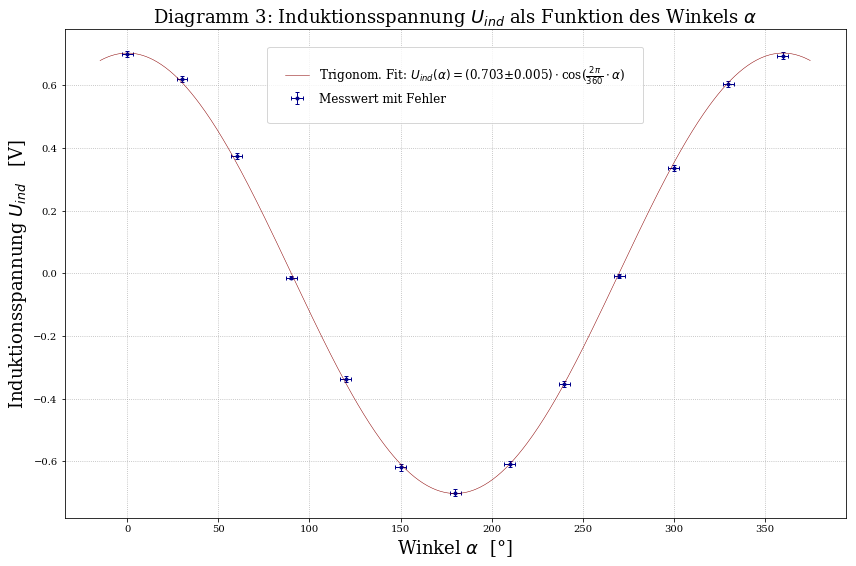

In [14]:
#Plot der Messdaten: U_ind gegen I_s
plt.errorbar(alpha, U_ind3, xerr=alpha_err, yerr=U_ind3_err,linewidth=1,linestyle='',marker='.',color='darkblue', label='Messwert mit Fehler')
plt.plot(np.linspace(-15,375,500),cos_fit(np.linspace(-15,375,500),*popt3),linewidth=0.5,color='darkred',
         label=r'Trigonom. Fit: $U_{ind}(\alpha) = ($' + str(round(popt3[0],3)) + 
         '$\pm$'+str(round(pcov3[0,0]**0.5,3)) + r'$) \cdot$cos($\frac{2\pi}{360}\cdot \alpha$)')
         
plt.xlabel(r'Winkel $ \alpha$  [°]', size=18)
plt.ylabel(r'Induktionsspannung $ U_{ind}$   [V]', size=18)
plt.title(r'Diagramm 3: Induktionsspannung $U_{ind} $ als Funktion des Winkels $\alpha$', size=18)
plt.grid(ls='dotted')

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)

plt.show()

In [15]:
#Güte des Fits
chi_squared3=np.sum((cos_fit(alpha,*popt3)-U_ind3)**2/U_ind3_err**2)

#Freiheitsgrade
dof3=len(U_ind3)-2

chi_squared_red3=chi_squared3/dof3

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared3))
print('chi_squared_red= ' + str(chi_squared_red3))
print()

#Fitwahrscheinlichkeit
prob3=round(1-chi2.cdf(chi_squared3,dof3),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob3) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 23.52082866879223
chi_squared_red= 2.1382571517083844

Die Fitwahrscheinlichkeit beträgt: 1.0 %


#### Verhältnis von induzierter zu angelegter Spannung als Funktion der Frequenz

In [16]:
#Kreisfrequenz
omega3=2*np.pi*np.array([20.2,44.1,64.9,88.0,106,122,142,162,182,204,425,636,861,1030,1230,1420,1650,1810,2040]) #Hz
omega3_err=0.03*omega3

#Eingangsspannung
U_ein=1e-3*np.array([368,383,380,371,371,371,371,371,371,371,371,371,371,371,372,370,369,372,372])
U_ein_err=0.03*U_ein

#Induktionsspannung
U_ind4=1e-3*np.array([152,213,230,237,242,240,243,244,247,246,246,245,247,249,248,249,250,252,253])
U_ind4_err=0.03*U_ind4

#Verhältnis
prop_U=U_ind4/U_ein
prop_U_err=prop_U*np.sqrt((U_ind4_err/U_ind4)**2+(U_ein_err/U_ein)**2)

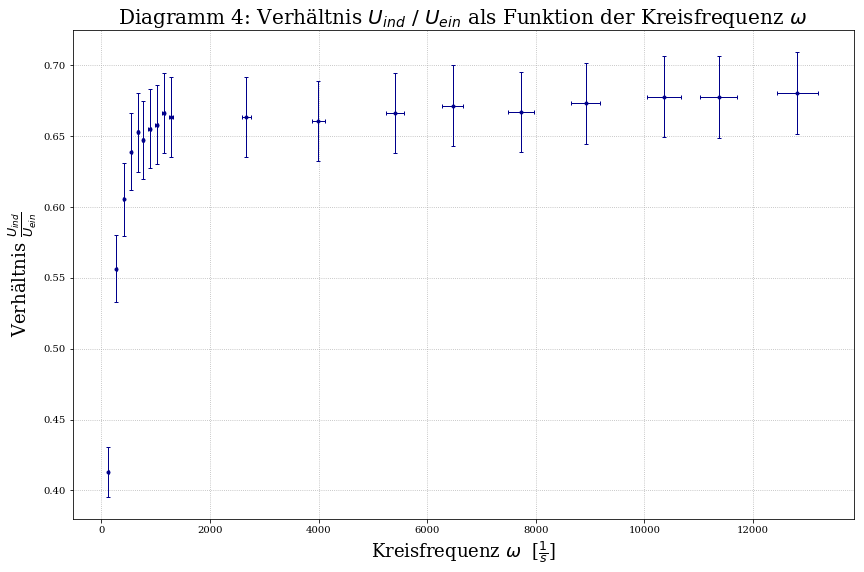

In [17]:
#Plot des Verhältnisse gegen die Frequenz
plt.errorbar(omega3,prop_U , xerr=omega3_err, yerr=prop_U_err,linewidth=1,linestyle=' ',marker='.',color='darkblue', label='Messwert mit Fehler')
plt.xlabel(r'Kreisfrequenz $ \omega$  [$\frac{1}{s}$]', size=18)
plt.ylabel(r'Verhältnis $\frac{U_{ind}}{U_{ein}}$', size=18)
plt.title(r'Diagramm 4: Verhältnis $U_{ind}\ / \ U_{ein}$ als Funktion der Kreisfrequenz $\omega$ ', size=20)
plt.grid(ls='dotted')

#plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)
plt.show()

In [18]:
#Spulenstrom
I_s2=1e-3*np.array([31.38,20.85,15.31,11.80,9.89,8.71,7.55,6.69,5.90,5.34,2.56,1.69,1.26,1.04,0.87,0.75,0.68,0.56,0.49])
I_s2_err=0.01*I_s2+0.00003*np.ones(len(I_s2))

#Widerstand
Rs=U_ein/I_s2
Rs_err=Rs*np.sqrt((U_ein_err/U_ein)**2+(I_s2_err/I_s2)**2)

popt4,pcov4=curve_fit(linear,omega3,Rs)

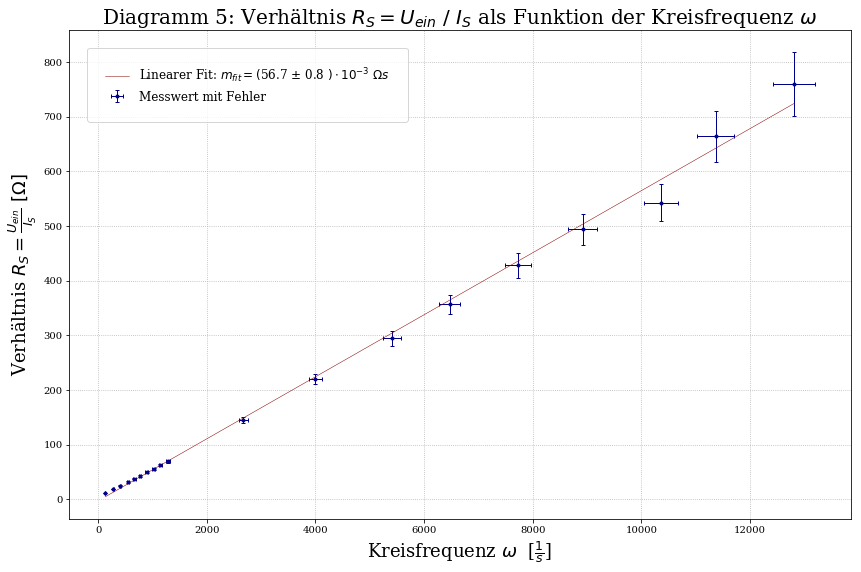

In [20]:
#Plot des Verhältnisse gegen die Frequenz
plt.errorbar(omega3,Rs, xerr=omega3_err, yerr=Rs_err,linewidth=1,linestyle='',marker='.',color='darkblue', label='Messwert mit Fehler')
plt.plot(omega3,linear(omega3,*popt4),linewidth=0.5,color='darkred',label='Linearer Fit: $m_{fit} = ($' + str(round(popt4[0]*1e3,1)) + ' $\pm$ ' + str(round(pcov4[0,0]**0.5*1e3,1)) + r' $) \cdot10^{-3} \ \Omega s$')
plt.xlabel(r'Kreisfrequenz $ \omega$  [$\frac{1}{s}$]', size=18)
plt.ylabel(r'Verhältnis $R_S= \frac{U_{ein}}{I_S} \ [\Omega]$', size=18)
plt.title(r'Diagramm 5: Verhältnis $R_S = U_{ein} \ / \ I_S $ als Funktion der Kreisfrequenz $\omega$ ', size=20)
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)
plt.show()

In [21]:
#Güte des Fits
chi_squared5=np.sum((linear(omega3,*popt4)-Rs)**2/Rs_err**2)

#Freiheitsgrade
dof5=len(Rs)-2

chi_squared_red5=chi_squared5/dof5

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared5))
print('chi_squared_red= ' + str(chi_squared_red5))
print()

#Fitwahrscheinlichkeit
prob5=round(1-chi2.cdf(chi_squared5,dof5),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob5) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 529.9192803918202
chi_squared_red= 31.17172237598942

Die Fitwahrscheinlichkeit beträgt: 0.0 %


#### Induktivität der Helmholtzspule

In [22]:
#Steigung des Diagramms entspricht der Induktivität
L=popt4[0]
L_err=pcov4[0,0]**0.5

print('Der Fit der Messwerte liefert füt die Induktivität:')
print('L = (' + str(L*1e3) + ' +/- ' + str(L_err*1e3) + ') mH')

Der Fit der Messwerte liefert füt die Induktivität:
L = (56.71291591109262 +/- 0.8434394288147467) mH


### Teil 3: Bestimmung des Erdmagnetfeldes

#### Direktmessung des Feldes

In [ ]:
#induzierte Spannung durch das Erdmagnetfeld
U_ind5=0.5*1e-3*145
U_ind5_err=0.5*1e-3*5

#Drehfrequenz der Flachspule
omega4=2*np.pi*16.3
omega4_err=2*np.pi*0.3

In [ ]:
#Magnetfeld aus Messwerten
B_erde=U_ind5/A/omega4/N
B_erde_err=B_erde*np.sqrt((omega4_err/omega4)**2+(U_ind5_err/U_ind5)**2)
print('Das Erdmagnetfeld wird aus unserer Messung betimmt auf:')
print('B_Erde = (' + str(round(B_erde*1e6,1)) + ' +/- ' + str(round(B_erde_err*1e6,1)) + ') 10^-6 T' )

#### Kompensationsmessung

In [ ]:
#Drehfrequenz
omega5=2*np.pi*16.5 #1/s
omega5_err=2*np.pi*0.3

#Kompensationsstrom 
I_komp=1e-3*48.79 #A
I_komp_err=1e-3*5

B_erde_v=(8*mu0*N2*I_komp)/(np.sqrt(125)*R)
B_erde_v_err=B_erde_v*(I_komp_err/I_komp)

print('Für die vertikale Komponente des Erdmagnetfeldes folgt:')
print('B_Erde_v = (' + str(round(B_erde_v*1e6,1)) + ' +/- ' + str(round(B_erde_v_err*1e6,1)) + ') 10^-6 T' )
print()

#verbleibende Induktionsspannung
U_ind6=0.5*1e-3*28.6#V
U_ind6_err=0.5*1e-3*0.3

B_erde_h=U_ind6/A/omega5/N
B_erde_h_err=B_erde_h*np.sqrt((omega5_err/omega5)**2+(U_ind6_err/U_ind6)**2)
print('Für die horizontale Komponente des Erdmagnetfeldes folgt:')
print('B_Erde_h = (' + str(round(B_erde_h*1e6,2)) + ' +/- ' + str(round(B_erde_h_err*1e6,2)) + ') 10^-6 T' )

In [ ]:
#Inklinationswinkel
beta=np.arctan((B_erde_v/B_erde_h))*360/(2*np.pi)
beta_err=360/(2*np.pi)*np.sqrt(((B_erde_v_err/B_erde_h)/(1+(B_erde_v/B_erde_h)**2))**2+((B_erde_v*B_erde_h_err/B_erde_h**2)/(1+(B_erde_v/B_erde_h)**2))**2)

print('Wir erhalten für den Inklinationswinkel: ')
print('Beta = (' + str(beta) + ' +/- ' + str(beta_err) + ') °')

In [ ]:
#Kontrollmessung
beta2=360/(2*np.pi)*np.arccos(B_erde_h/B_erde)
beta2_err=360/(2*np.pi)*np.sqrt(((B_erde_h_err/B_erde)/(np.sqrt(1+(B_erde_h/B_erde)**2)))**2+(((B_erde_h*B_erde_err/B_erde**2)/(np.sqrt(1+(B_erde_h/B_erde)**2)))**2))

beta3=360/(2*np.pi)*np.arcsin(B_erde_v/B_erde)
beta3_err=360/(2*np.pi)*np.sqrt(((B_erde_v_err/B_erde)/(np.sqrt(1+(B_erde_v/B_erde)**2)))**2+(((B_erde_v*B_erde_err/B_erde**2)/(np.sqrt(1+(B_erde_v/B_erde)**2)))**2))

#Mittelwertbildung
beta_mean=np.mean([beta2,beta3])
beta_mean_err=0.5*np.sqrt(beta2_err**2+beta3_err**2)
beta_mean_std=np.std([beta2,beta3])/np.sqrt(2)

print('Aus den beiden Einzelkomponenten folgt für den Inklinationswinkel:')
print('Beta = (' + str(beta_mean) + ' +/- ' + str(beta_mean_err) + ' +/- ' +str(beta_mean_std) + ') °')

#### Vergleich mit dem theoretischem Wert

In [ ]:
beta_theo=65+(8/60) #Wert für Mannheim gemäß Aushang im Versuchsraum

diff_beta=np.abs(beta_theo-beta_mean)

print('Der Vergleich mit dem Literaturwert liefert:')
print('∆beta = (' + str(diff_beta) + ' +/- ' + str(beta_mean_err) + ' +/- ' +str(beta_mean_std) + ') °')